# Superstore Data Analysis 
### Today I am going to work on Superstore dataset. Analyse the data by **R** and get some usefull insights about the data.

#### firstly set up the working directory

In [ ]:
# to see the current working directory
getwd()

##### now let jump in the pull off data 

In [ ]:
# importing the data -- I will always take the master dataset in variable = ** x **
x <- read.csv("superstore.csv")

In [ ]:
View(x)

## Explore the data
#### understand the data

##### before analysis or anyother steps, I have to understan everything about the data. it is most important steps before to drive deep insights. In this steps I will explore everything about this dataset.

In [ ]:
# importing all the libraries what I need the most 
library(tidyverse)
library(here)
library(skimr)

In [ ]:
# see some trailer 
head(x)
tail(x)

In [ ]:
# first good look of dataset with tidy manner
View(x)

##### now its time to deeply understnd the dataset

In [ ]:
# see the dimenstion of the dataset
dim(x)

##### wooow ! the dataset have 9994 observations and 22 variables

In [50]:
# let see how many variable are there
length(x)

[1] 22

In [51]:
# let see all the names of the 22 variables 
names(x)

[1] "row_id"        "order_id"      "order_date"    "ship_date"    
 [5] "ship_mode"     "customer_id"   "customer_name" "segment"      
 [9] "country"       "city"          "state"         "postal_code"  
[13] "region"        "product_id"    "category"      "sub_category" 
[17] "product_name"  "sales"         "quantity"      "discount"     
[21] "profit"        "X"

In [ ]:
# let see what is the structure and datatype of variables 
glimpse(x)

##### wow ! there is 9994 observations and 22 variables

In [57]:
# let point it out all the improper datatype of variable
class(x$order_date)
class(x$ship_date)
class(x$sales)          

[1] "character"

[1] "character"

[1] "character"

In [59]:
# do some prove for no of obs.
length(x$profit)
length(x$segment)
length(x$discount)

[1] 9994

[1] 9994

[1] 9994

##### let see some on the segment data

In [63]:
# let see the unique values in some variable matrix
unique(x$segment)

[1] "Consumer"    "Corporate"   "Home Office"

In [64]:
# let see the frequency of the segment variable
table(x$segment)


   Consumer   Corporate Home Office 
       5191        3020        1783 

In [67]:
desc(sort(table(x$segment)))

Home Office   Corporate    Consumer 
      -1783       -3020       -5191

In [70]:
# let see with tidy manner
View(sort(table(x$segment),decreasing = TRUE))


   Consumer   Corporate Home Office 
       5191        3020        1783 

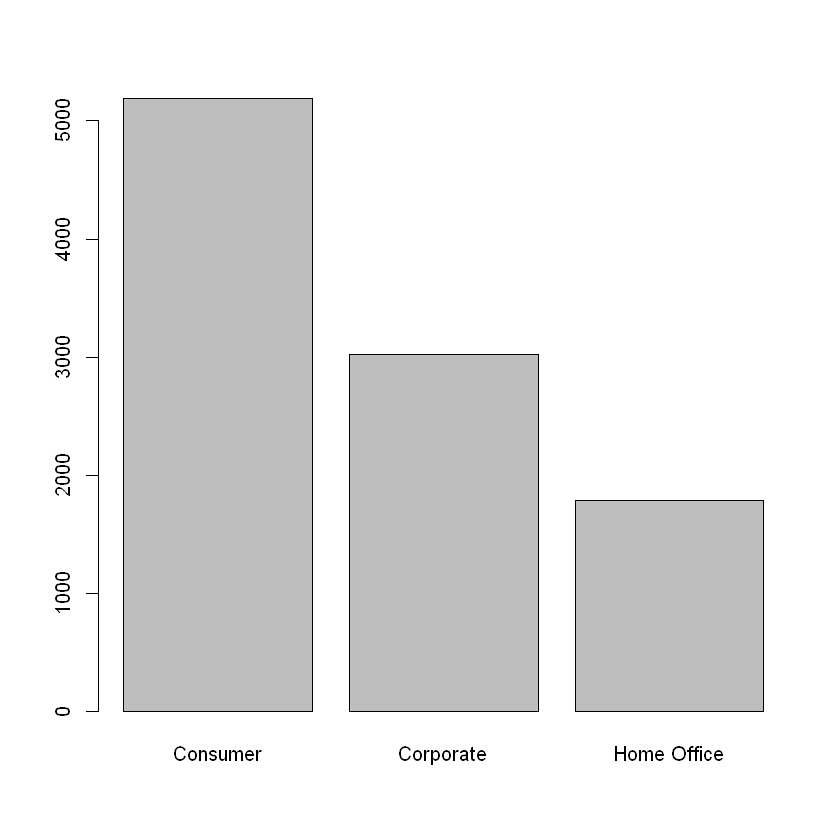

In [72]:
# let see by graph 
barplot(sort(table(x$segment),decreasing = TRUE))

##### **NULL values**  